<a href="https://colab.research.google.com/github/gabrielfraga17/IA-Generativa/blob/main/AKCIT_GenAI_M10_Colab_Unidade_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

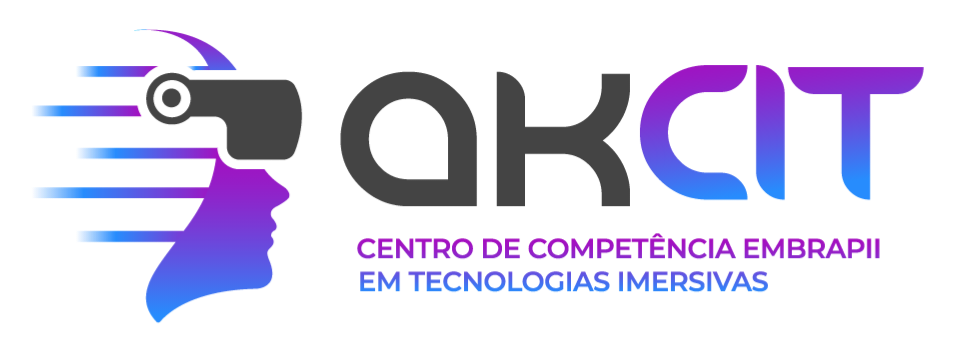


# Identificação

**Microcurso:** Arquiteturas neurais avançadas para IA generativa para visão computacional


**Docente:** M.Sc. Leon Sólon da Silva

## 📚 Introdução

Enquanto Autoencoders e VAEs aprendem representações compactas e GANs exploram o aprendizado adversarial,  
os **Modelos de Difusão** seguem outro caminho: **aprender a reverter ruído**.

- No processo direto (forward), imagens reais são degradadas progressivamente até se tornarem ruído puro.  
- No processo reverso, uma rede neural (geralmente uma U-Net) aprende a remover o ruído passo a passo, recriando imagens coerentes.  

O **Stable Diffusion** trouxe um avanço importante: realiza a difusão no **espaço latente comprimido** (via VAE), em vez do espaço de pixels, e usa **Transformers** para condicionar o processo com descrições textuais.  

Essa arquitetura combina eficiência, qualidade e controle, tornando-se referência em IA generativa de imagens.


## 🎯 Objetivos de Aprendizagem

Ao final desta unidade, o estudante será capaz de:

1. Explicar o funcionamento dos **Modelos de Difusão** como processo de remoção de ruído.  
2. Diferenciar a abordagem de difusão de arquiteturas anteriores (GANs, VAEs).  
3. Entender a arquitetura **Stable Diffusion** e o papel dos Transformers no condicionamento textual.  
4. Utilizar a biblioteca **Diffusers (Hugging Face)** para gerar imagens por texto (text-to-image).  
5. Aplicar variações do pipeline: **image-to-image** e **inpainting**.  
6. Avaliar resultados e explorar parâmetros de controle.  


## 🧠 Explicação Teórica

- **Forward process:** adiciona ruído gaussiano em T passos até transformar a imagem em puro ruído.  
- **Reverse process:** uma U-Net é treinada para prever o ruído em cada passo e removê-lo progressivamente.  
- **Loss function:** em modelos modernos (DDPM), a rede aprende a prever diretamente o ruído (L2 Loss).  

Comparação:
- **GANs:** aprendizado adversarial, rápido na inferência, mas instável.  
- **Difusão:** aprendizado estável e cobertura ampla da distribuição, mas requer várias iterações de denoising.  

**Stable Diffusion (2022):**
- Realiza difusão no **espaço latente comprimido** de um VAE.  
- Usa **Transformers** para codificar texto e guiar a geração via **cross-attention**.  
- Permite aplicações práticas: **text-to-image, img2img, inpainting, ControlNet**.  


## 💻 Exemplos Práticos

Vamos utilizar a biblioteca **Diffusers (Hugging Face)** para duas tarefas:

1. **Text-to-Image:** gerar imagens a partir de prompts em linguagem natural.  
2. **Image-to-Image:** transformar uma imagem inicial em uma nova versão guiada por texto.  

Essas tarefas ilustram como os modelos de difusão podem ser aplicados em pipelines reais.


## 📝 Exercícios e Desafios

1. Alterar o **prompt textual** e observar mudanças no estilo e conteúdo.  
2. Variar o número de **inference steps** (ex.: 20, 50, 100) e analisar impacto na nitidez.  
3. Modificar o **guidance scale** para ver como o modelo equilibra diversidade vs aderência ao texto.  
4. Testar **image-to-image** com diferentes níveis de força (`strength`) para ajustes sutis ou transformações radicais.  
5. Explorar **inpainting** criando máscaras de edição em imagens reais.  


## 📖 Referências Bibliográficas

- SOHL-DICKSTEIN, J. et al. *Deep Unsupervised Learning using Nonequilibrium Thermodynamics*. ICML, 2015.  
- HO, J.; JAIN, A.; ABBEEL, P. *Denoising Diffusion Probabilistic Models*. NeurIPS, 2020.  
- DHARIWAL, P.; NICHOL, A. *Diffusion Models Beat GANs on Image Synthesis*. NeurIPS, 2021.  
- ROMBACH, R. et al. *High-Resolution Image Synthesis with Latent Diffusion Models*. CVPR, 2022.  
- PODELL, T. et al. *SDXL: Improving Latent Diffusion Models for High-Resolution Image Synthesis*. 2023.  
- VON PLATEN, P. et al. *Diffusers: State-of-the-art diffusion models*. Hugging Face, 2022.  


In [ ]:
#!pip install diffusers transformers accelerate safetensors


In [ ]:
from diffusers import StableDiffusionPipeline, StableDiffusionImg2ImgPipeline, StableDiffusionInpaintPipeline
import torch
from PIL import Image
import requests
from io import BytesIO


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

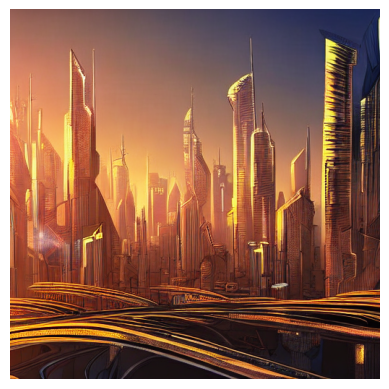

In [ ]:
# ----------------------------
# 1. Text-to-Image
# ----------------------------
import os, torch, matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline

# (opcional) reduzir fragmentação de VRAM
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:64"

# Carrega em meia precisão e ativa otimizações de memória
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    #"stabilityai/stable-diffusion-2-1-base", # demora mais, mas é um modelo bem melhor
    torch_dtype=torch.float16
)
pipe.enable_attention_slicing()
pipe.enable_model_cpu_offload()   # mais econômico que pipe.to("cuda")

prompt = "A futuristic city skyline at sunset, digital art"
generator = torch.Generator(device="cuda").manual_seed(42)  # reprodutível (opcional)

result = pipe(
    prompt,
    num_inference_steps=30,
    guidance_scale=7.5,
    generator=generator,
    height=512,
    width=512
)
image = result.images[0]

# Exibir corretamente no Colab
plt.imshow(image)
plt.axis("off")
plt.show()

# (opcional) salvar o arquivo
# image.save("text2image_result.png")
# from google.colab import files; files.download("text2image_result.png")


[download] status=404, content-type='text/plain; charset=utf-8' -> usando placeholder


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

merges.txt: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/15 [00:00<?, ?it/s]

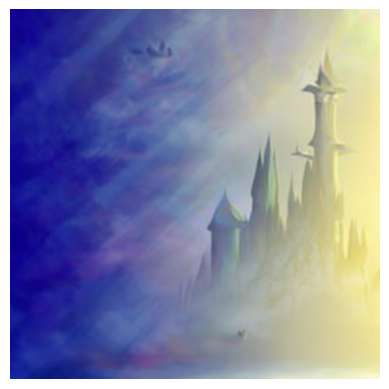

In [ ]:
# ----------------------------
# 2. Image-to-Image
# ----------------------------
import os, requests, torch, numpy as np, matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
from diffusers import StableDiffusionImg2ImgPipeline

# (A) Helper: baixa imagem com checagem; se falhar, usa placeholder
def load_image_or_placeholder(url=None, size=(512, 512)):
    try:
        if url:
            r = requests.get(url, stream=True, timeout=20)
            ct = r.headers.get("content-type", "")
            if r.status_code == 200 and "image" in ct:
                return Image.open(BytesIO(r.content)).convert("RGB").resize(size)
            else:
                print(f"[download] status={r.status_code}, content-type='{ct}' -> usando placeholder")
        else:
            print("[download] URL vazia -> usando placeholder")
    except Exception as e:
        print(f"[download] falhou: {e} -> usando placeholder")

    # Placeholder: gradiente colorido (garante que a célula rode)
    w, h = size
    grad = np.linspace(0, 255, w, dtype=np.uint8)
    img = np.dstack([
        np.tile(grad, (h, 1)),
        np.flipud(np.tile(grad, (h, 1))),
        np.full((h, w), 160, np.uint8)
    ])
    return Image.fromarray(img)

# (B) Tenta baixar; se o link falhar, segue com placeholder
img_url = "https://raw.githubusercontent.com/huggingface/diffusers/main/docs/source/en/_static/img/sketch-mountains-input.jpg"
init_image = load_image_or_placeholder(img_url, size=(512, 512))

# (C) Reduz fragmentação de VRAM e usa fp16
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:64"

pipe_img2img = StableDiffusionImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    #"stabilityai/stable-diffusion-2-1-base",
    torch_dtype=torch.float16
)

# Em vez de .to("cuda"), use offload automático (bem mais econômico em VRAM)
pipe_img2img.enable_attention_slicing()
pipe_img2img.enable_model_cpu_offload()  # requer accelerate instalado (já vem com diffusers)

# (D) Geração (com seed para reprodutibilidade)
prompt = "A fantasy landscape with castles and dragons, cinematic lighting, highly detailed"
generator = torch.Generator(device="cuda").manual_seed(42)

result = pipe_img2img(
    prompt=prompt,
    image=init_image,
    strength=0.6,          # 0.2 = mudanças sutis, 0.8 = mudanças grandes
    guidance_scale=7.5,    # aderência ao texto (6-10 costuma ir bem)
    num_inference_steps=25,
    generator=generator
)
image = result.images[0]

# (E) Mostrar corretamente no Colab
plt.imshow(image)
plt.axis("off")
plt.show()




Token indices sequence length is longer than the specified maximum sequence length for this model (91 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', usado em campanhas publicitárias digitais .']


  0%|          | 0/40 [00:00<?, ?it/s]

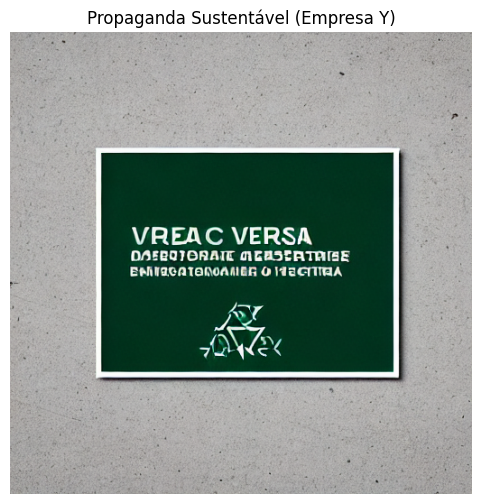

In [ ]:
# Exemplo de propaganda para empresa voltada à sustentabilidade
prompt_sustentabilidade = """
Um cartaz publicitário minimalista para uma empresa de energia chamada AK EletriCIT, com foco em sustentabilidade.
Mostre florestas verdes, energia solar e ícones de reciclagem.
Paleta de cores: verde, azul e branco.
Estilo: flat design moderno, usado em campanhas publicitárias digitais.
"""

image_sustentabilidade = pipe(
    prompt_sustentabilidade,
    num_inference_steps=40,
    guidance_scale=7.5
).images[0]

plt.figure(figsize=(6,6))
plt.imshow(image_sustentabilidade)
plt.axis("off")
plt.title("Propaganda Sustentável (Empresa Y)")
plt.show()


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['.']


  0%|          | 0/40 [00:00<?, ?it/s]

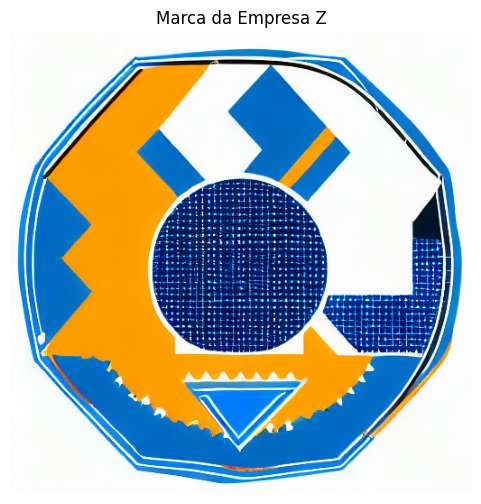

In [ ]:
# Exemplo de criação de marca para empresa fictícia Z
prompt_marca = """
Logotipo minimalista para a empresa AKCIT Soluções em Tecnologia, focada no mercado em inovação tecnológica.
Formas geométricas, tipografia clean, cores azul escuro e laranja.
Estilo moderno e versátil para uso em apps e sites.
"""

image_marca = pipe(
    prompt_marca,
    num_inference_steps=40,
    guidance_scale=8.0
).images[0]

plt.figure(figsize=(6,6))
plt.imshow(image_marca)
plt.axis("off")
plt.title("Marca da Empresa AKCIT Soluções em Tecnologia")
plt.show()


  0%|          | 0/35 [00:00<?, ?it/s]

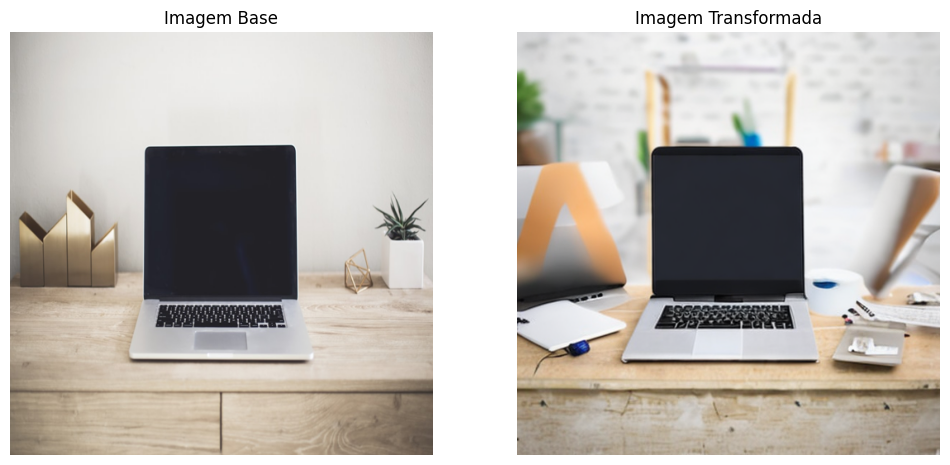

In [ ]:
from PIL import Image
import requests

# Exemplo: usar imagem pública como base (Creative Commons do Unsplash/Pexels)
url_img_base = "https://images.unsplash.com/photo-1496181133206-80ce9b88a853?q=80&w=1171&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"  # laptop
img_base = Image.open(requests.get(url_img_base, stream=True).raw).convert("RGB").resize((512,512))

prompt_img2img_sust = """
Colocar o logo de uma empresa na tela do laptop.
"""

image_img2img_sust = pipe_img2img(
    prompt=prompt_img2img_sust,
    image=img_base,
    strength=0.7,
    guidance_scale=8.0
).images[0]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.imshow(img_base); plt.axis("off"); plt.title("Imagem Base")
plt.subplot(1,2,2); plt.imshow(image_img2img_sust); plt.axis("off"); plt.title("Imagem Transformada")
plt.show()


  0%|          | 0/30 [00:00<?, ?it/s]

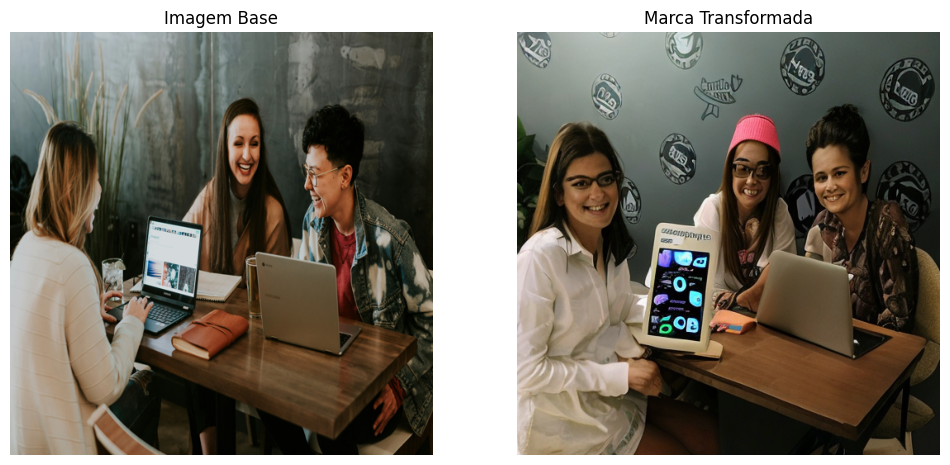

In [ ]:
# Outra imagem pública como base
url_img_base2 = "https://images.unsplash.com/photo-1522202176988-66273c2fd55f"  # Pessoas conversando
img_base2 = Image.open(requests.get(url_img_base2, stream=True).raw).convert("RGB").resize((512,512))

prompt_img2img_marca = """
Colocar stickers no notebook com logo de uma empresa. Colocar uma placa com nome da empresa na parede ao fundo.
"""

image_img2img_marca = pipe_img2img(
    prompt=prompt_img2img_marca,
    image=img_base2,
    strength=0.6,
    guidance_scale=7.5
).images[0]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.imshow(img_base2); plt.axis("off"); plt.title("Imagem Base")
plt.subplot(1,2,2); plt.imshow(image_img2img_marca); plt.axis("off"); plt.title("Marca Transformada")
plt.show()


## ✅ Conclusão

Nesta unidade implementamos e testamos **modelos de difusão** na prática usando a biblioteca **Diffusers**:

- **Text-to-Image:** geração de imagens a partir de descrições textuais.  
- **Image-to-Image:** transformação de imagens existentes guiadas por prompts.  


Esses experimentos ilustram a força dos modelos de difusão, combinando **estabilidade de treinamento, fidelidade visual e controle criativo**.  

➡️ Próximos passos: explorar **inpaiting, SDXL, ControlNet e LoRAs** para personalização e controle avançado da geração.


## 📝 Exercícios

### Exercício
- Escolha um dos prompts já mostrados em aula (ex.: propaganda sustentável ou logotipo minimalista).
- Altere o **texto do prompt** para criar uma variação:
  - Pode mudar as cores,
  - o estilo artístico (realista, aquarela, 3D, pixel art),
  - ou o público-alvo (ex.: crianças, empresários, jovens universitários).
- Gere a nova imagem e compare com o resultado original.

> Objetivo: praticar como **pequenas mudanças no prompt** geram diferenças perceptíveis nas imagens.

---

### 🚀 Desafio
- Faça o **image-to-image** com uma imagem pública que você mesmo encontre.
- Sua tarefa é transformar a imagem base em um **cartaz ou logotipo** para uma empresa fictícia:
  - Defina um setor (ex.: saúde, educação, transporte).
  - Crie um **prompt detalhado** que incorpore elementos visuais, estilo e paleta de cores.
- Teste diferentes valores de `strength` (ex.: 0.4, 0.7, 0.9) e observe como isso altera a fidelidade em relação à imagem original.

> Objetivo: aprender a **combinar imagem base e prompt** para controlar o nível de transformação e personalizar resultados para casos de uso reais.
